Рассмотрим начально-краевую задачу для одномерного уравнения теплопроводности:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$


c краевыми условиями $(t \geqslant 0)$

$$
u(0, t) = u(1, t) = 0
$$

и начальным условием $(0 < x < 1)$

$$
u(x, 0) = \sin{\pi x} \;.
$$

Требуется написать программу, строящую решение в области $0 \leqslant x \leqslant 1$ и $t \geqslant 0$ с использованием конечно-разностной неявной схемы на четырехточечном шаблоне.

Решение визуализировать, сравнить с точным решением.

Рассчитать порядок точности схемы и сравнить с порядком аппроксимации.

Решение: $u(x,t) = sin(\pi x) e^{- \pi^2 t} $  
Порядок аппроксимации: $O(\tau+h^2)$   
Схема абсолютно устойчива

In [156]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from importlib import reload
from scipy.linalg import solve_banded
reload(plt)
%matplotlib notebook

In [157]:
def solve_implicitly(tau, h, T, u0):
    K = math.ceil(1 / h) + 1;
    N = math.ceil(T / tau) + 1;
    
    g = tau / h / h;
    
    # banded format of a tridiagonal matrix
    A = np.zeros(shape=(3, K-2));
    A[0, 1:] = g
    A[2, :-1] = g;
    A[1, :] = -(1 + 2*g)

    y = np.zeros(shape=(N, K))
    x0 = np.arange(1, K-1) * h
    y[0, 1:K-1] = u0(x0)
    
    for n in np.arange(1,N):
        b = -y[n - 1,1:-1]
        y[n, 1:-1] = solve_banded((1, 1), A, b)
    
    return y

def plot(y, u, tau, h, title):
    K = y.shape[1]
    N = y.shape[0]
    X = np.array([i * h  for i in np.arange(K)])
    T = np.array([n * tau for n in np.arange(N)])
    XX, YY = np.meshgrid(X, T)

    Z = u(XX, YY)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(XX, YY, Z)
    ax.scatter3D(XX, YY, y, c='Red', s=1);
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('z')
    ax.set_title(title);

<IPython.core.display.Javascript object>


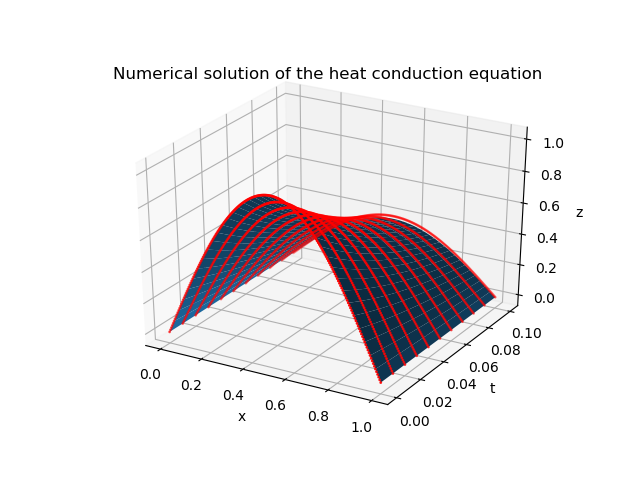

In [158]:
def u(x, t):
    return np.sin(math.pi * x)*np.exp(-math.pi *math.pi * t)

def u0(x):
    return np.sin(math.pi * x)

tau = 0.01
h = 0.005
T = 0.1;

y = solve_implicitly(tau, h, T, u0)
plot(y, u, tau, h, "Numerical solution of the heat conduction equation")
yj = y# plot is interacitve

<IPython.core.display.Javascript object>


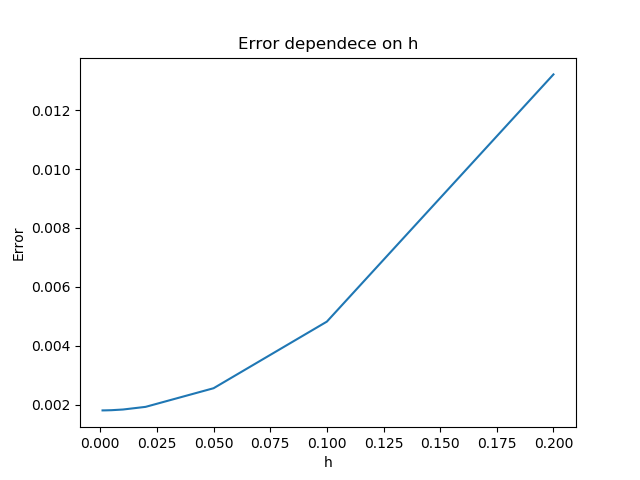

Text(0.5, 1.0, 'Error dependece on h')

In [160]:
def mesh_norm(x):
    return np.abs(x).max()

tau = 0.001
hs = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
T = 1.0

err = []

for h in hs:
    
    y = solve_implicitly(tau, h, T, u0)
    
    K = y.shape[1]
    N = y.shape[0]
    X = np.array([i * h  for i in np.arange(K)])
    Y = np.array([n * tau for n in np.arange(N)])
    XX, YY = np.meshgrid(X, Y)

    z = u(XX, YY)
    err.append(mesh_norm(z - y))

plt.figure()
plt.plot(hs, err)
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error dependece on h')

<IPython.core.display.Javascript object>


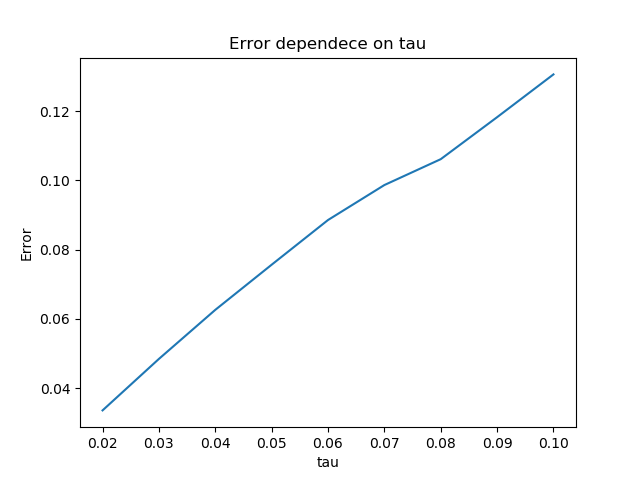

Text(0.5, 1.0, 'Error dependece on tau')

In [159]:
h = 0.001
taus = np.arange(0.1, 0.01, -0.01)
T = 1.0

err = []

for tau in taus:
    
    y = solve_implicitly(tau, h, T, u0)
    
    K = y.shape[1]
    N = y.shape[0]
    X = np.array([i * h  for i in np.arange(K)])
    Y = np.array([n * tau for n in np.arange(N)])
    XX, YY = np.meshgrid(X, Y)

    z = u(XX, YY)
    err.append(mesh_norm(z - y))
    
plt.figure()
plt.plot(taus, err)
plt.xlabel('tau')
plt.ylabel('Error')
plt.title('Error dependece on tau')

Судя по графику, порядок точности по $\tau$ получился линейным, по h квадратичным, что совпадает с порядком аппроксимации конечно-разностной схемы 